In [4]:
# pd & np libraries to make life easier
import pandas as pd
import numpy as np

# visualizers I'll be using
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# to perform stats tests
from scipy import stats

# all sklearn lib's functs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


#import all functions created in acquire , prepare & explore
import prepare
import acquire
import model
import explore

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
cat_vars = ['churn', 'contract_type', 'internet_service_type', 'payment_type', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

quant_vars = ['tenure', 'monthly_charges', 'churn_encoded']

In [6]:
# read Telco data from sql
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [7]:
df = prepare.prep_telco_data(df)

In [8]:
df

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.60,593.30,No,One year,DSL,Mailed check,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.90,542.40,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,No,One year,DSL,Mailed check,1,0,...,0,0,0,1,0,0,0,0,0,1
7039,0,22,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,0,0,1,0,0,1,0,0,1,0
7040,0,2,50.30,92.75,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,0,0,0,0,0,0,0,1
7041,0,67,67.85,4627.65,No,Two year,DSL,Mailed check,0,1,...,0,0,1,0,1,0,0,0,0,1


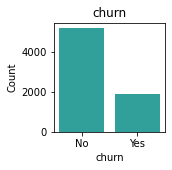

    churn  Count  Percent
No     No   5163    73.42
Yes   Yes   1869    26.58
_________________________________________________________________


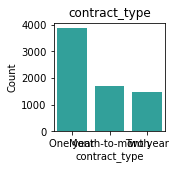

                 contract_type  Count  Percent
Month-to-month        One year   3875    55.11
Two year        Month-to-month   1685    23.96
One year              Two year   1472    20.93
_________________________________________________________________


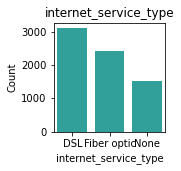

            internet_service_type  Count  Percent
Fiber optic                   DSL   3096    44.03
DSL                   Fiber optic   2416    34.36
None                         None   1520    21.62
_________________________________________________________________


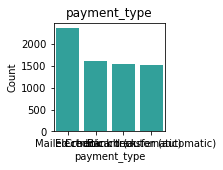

                                        payment_type  Count  Percent
Electronic check                        Mailed check   2365    33.63
Mailed check                        Electronic check   1604    22.81
Bank transfer (automatic)    Credit card (automatic)   1542    21.93
Credit card (automatic)    Bank transfer (automatic)   1521    21.63
_________________________________________________________________


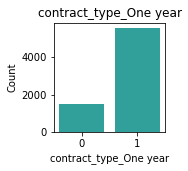

   contract_type_One year  Count  Percent
0                       1   5560    79.07
1                       0   1472    20.93
_________________________________________________________________


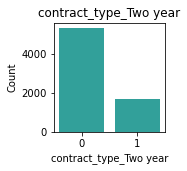

   contract_type_Two year  Count  Percent
0                       0   5347    76.04
1                       1   1685    23.96
_________________________________________________________________


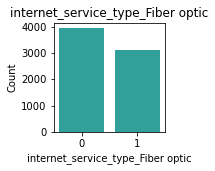

   internet_service_type_Fiber optic  Count  Percent
0                                  0   3936    55.97
1                                  1   3096    44.03
_________________________________________________________________


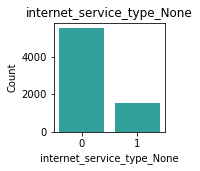

   internet_service_type_None  Count  Percent
0                           0   5512    78.38
1                           1   1520    21.62
_________________________________________________________________


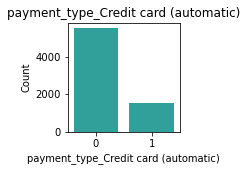

   payment_type_Credit card (automatic)  Count  Percent
0                                     0   5511    78.37
1                                     1   1521    21.63
_________________________________________________________________


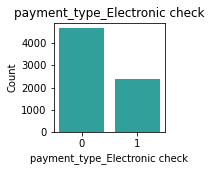

   payment_type_Electronic check  Count  Percent
0                              0   4667    66.37
1                              1   2365    33.63
_________________________________________________________________


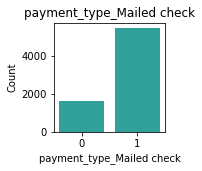

   payment_type_Mailed check  Count  Percent
0                          1   5428    77.19
1                          0   1604    22.81
_________________________________________________________________


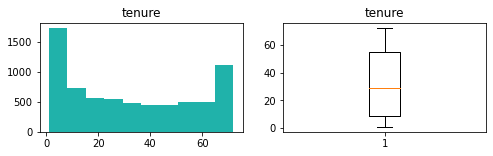

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


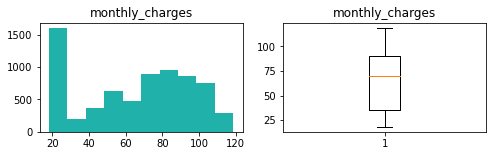

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: monthly_charges, dtype: float64


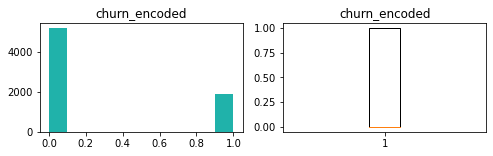

count    7032.000000
mean        0.265785
std         0.441782
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn_encoded, dtype: float64


In [10]:
explore.explore_univariate(df, cat_vars, quant_vars)

In [11]:
explore.freq_table(df, 'churn')

,churn,Count,Percent
No,No,5163,73.42
Yes,Yes,1869,26.58


In [12]:
explore.freq_table(df, 'contract_type')

,contract_type,Count,Percent
Month-to-month,One year,3875,55.11
Two year,Month-to-month,1685,23.96
One year,Two year,1472,20.93


In [13]:
explore.freq_table(df, 'payment_type')

,payment_type,Count,Percent
Electronic check,Mailed check,2365,33.63
Mailed check,Electronic check,1604,22.81
Bank transfer (automatic),Credit card (automatic),1542,21.93
Credit card (automatic),Bank transfer (automatic),1521,21.63


In [14]:
explore.freq_table(df, 'internet_service_type')

,internet_service_type,Count,Percent
Fiber optic,DSL,3096,44.03
DSL,Fiber optic,2416,34.36
None,None,1520,21.62


(Text(0.5, 1.0, 'tenure'),
 count    7032.000000
 mean       32.421786
 std        24.545260
 min         1.000000
 25%         9.000000
 50%        29.000000
 75%        55.000000
 max        72.000000
 Name: tenure, dtype: float64)

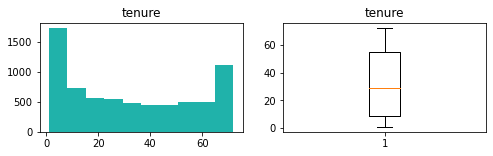

In [15]:
explore.explore_univariate_quant(df, 'tenure')

(Text(0.5, 1.0, 'monthly_charges'),
 count    7032.000000
 mean       64.798208
 std        30.085974
 min        18.250000
 25%        35.587500
 50%        70.350000
 75%        89.862500
 max       118.750000
 Name: monthly_charges, dtype: float64)

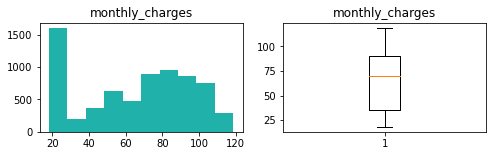

In [16]:
explore.explore_univariate_quant(df, 'monthly_charges')

monthly_charges 
____________________



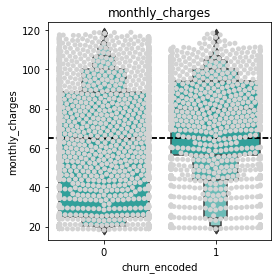

                count       mean        std    min    25%    50%     75%  \
churn_encoded                                                              
0              5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475   
1              1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200   

                  max  
churn_encoded          
0              118.75  
1              118.35   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3663498.5, pvalue=8.467195044548749e-54)

____________________



In [22]:
explore.explore_bivariate_quant(df, 'churn_encoded', 'monthly_charges')

contract_type 
_____________________

          chi2        p-value  degrees of freedom
0  1179.545829  7.326182e-257                   2

observed:
 churn_encoded      0     1   All
contract_type                   
Month-to-month  2220  1655  3875
One year        1306   166  1472
Two year        1637    48  1685
All             5163  1869  7032

expected:
              0            1
0  2845.083191  1029.916809
1  1080.764505   391.235495
2  1237.152304   447.847696


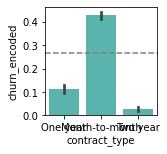


_____________________



In [18]:
explore.explore_bivariate_categorical(df, 'churn_encoded', 'contract_type')

internet_service_type 
_____________________

         chi2        p-value  degrees of freedom
0  728.695614  5.831199e-159                   2

observed:
 churn_encoded             0     1   All
internet_service_type                  
DSL                    1957   459  2416
Fiber optic            1799  1297  3096
None                   1407   113  1520
All                    5163  1869  7032

expected:
              0           1
0  1773.863481  642.136519
1  2273.129693  822.870307
2  1116.006826  403.993174


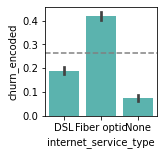


_____________________



In [19]:
explore.explore_bivariate_categorical(df, 'churn_encoded', 'internet_service_type')

payment_type 
_____________________

       chi2        p-value  degrees of freedom
0  645.4299  1.426310e-139                   3

observed:
 churn_encoded                 0     1   All
payment_type                               
Bank transfer (automatic)  1284   258  1542
Credit card (automatic)    1289   232  1521
Electronic check           1294  1071  2365
Mailed check               1296   308  1604
All                        5163  1869  7032

expected:
              0           1
0  1132.159556  409.840444
1  1116.741041  404.258959
2  1736.418515  628.581485
3  1177.680887  426.319113


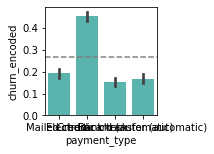


_____________________



In [20]:
explore.explore_bivariate_categorical(df, 'churn_encoded', 'payment_type')

internet_service_type 
_____________________

           chi2  p-value  degrees of freedom
0  11769.530754      0.0                3166

observed:
 monthly_charges        18.25  18.4  18.55  18.7  18.75  18.8  18.85  18.9  \
internet_service_type                                                       
DSL                        0     0      0     0      0     0      0     0   
Fiber optic                0     0      0     0      0     0      0     0   
None                       1     1      1     2      1     7      5     2   
All                        1     1      1     2      1     7      5     2   

monthly_charges        18.95  19.0  ...  117.45  117.5  117.6  117.8  118.2  \
internet_service_type               ...                                       
DSL                        0     0  ...       0      0      0      0      0   
Fiber optic                0     0  ...       1      1      1      1      1   
None                       6     7  ...       0      0      0      0     

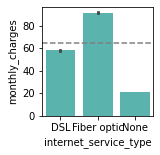


_____________________



In [21]:
explore.explore_bivariate_categorical(df, 'monthly_charges', 'internet_service_type')

In [ ]:
# A. Distributions See above

# B. Set Hypothesis

# Ho# : Mean of monthly charges of churned customers >= Mean of monthly charges of all customers
# Ha# : Mean of monthly charges of churned customers < Mean of monthly charges of all customers

# C. Set Alpha See above

# D. Assumptions See above

# E. Compute test statistics

<AxesSubplot:>

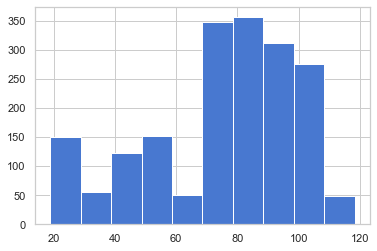

In [48]:
#one tailed t test, monthly charges are higher for customers who churn than those that dont
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()

In [49]:
#Ho: mean of monthly charges of churned customers is >= mean of monthly charges of all customers
#Ha: mean of monthly charges of churned customers is < mean of monthly charges of all customers
alpha=.05
churn_sample = df[df.churn == 'Yes'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

16.90140234289535 4.80131988951768e-60 0.05


In [54]:
if p/2 < alpha:
    print("We fail to reject Ho")
elif t > 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

We fail to reject Ho


<AxesSubplot:>

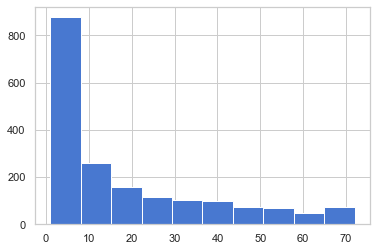

In [47]:
#one tail t test, majority of churned customers are month to month customers, aka tenure less than 12
churn_sample = df[df.churn == 'Yes'].tenure

churn_sample.hist()

In [52]:
#Ho: mean length tenure of churned customers is <= mean length tenure of all customers
#Ha: mean length tenure of churned customers is > mean length tenure of all customers
alpha=.05
churn_sample = df[df.churn == 'Yes'].tenure
overall_mean = df.tenure.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

-31.96865819544077 1.508565587390666e-179 0.05


In [53]:
if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

We fail to reject Ho


<AxesSubplot:>

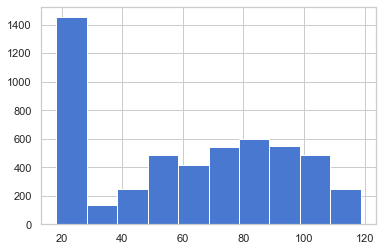

In [60]:

no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()

In [ ]:
# charges of customers who churn significantly different than those who do not churn

# Ho: charges of customers who churn equals that of those who don't churn.

# Ha: charges of customers who churn is not equal to that of those who don't churn.

In [61]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p
#-t value and 0 p, significantly different

(-69.25919853046089, 0.0)

In [68]:
df

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.60,593.30,No,One year,DSL,Mailed check,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.90,542.40,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,No,One year,DSL,Mailed check,1,0,...,0,0,0,1,0,0,0,0,0,1
7039,0,22,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,0,0,1,0,0,1,0,0,1,0
7040,0,2,50.30,92.75,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,0,0,0,0,0,0,0,1
7041,0,67,67.85,4627.65,No,Two year,DSL,Mailed check,0,1,...,0,0,1,0,1,0,0,0,0,1


In [74]:
r_monthly_charges, _ = stats.pearsonr(df.churn_encoded, df.monthly_charges)
r_tenure, _ = stats.pearsonr(df.churn_encoded, df.tenure)

print('Correlation between churn and monthly_charges')
print(f'  r = {r_monthly_charges:.3f}')
print('Correlation between churn and tenure')
print(f'  r = {r_tenure:.3f}')

Correlation between churn and monthly_charges
  r = 0.193
Correlation between churn and tenure
  r = -0.354


In [76]:
r, p = stats.pearsonr(df.churn_encoded, df.monthly_charges)
r, p

(0.1928582184700866, 6.760843117985555e-60)

In [77]:
index = ['Churn', 'No Churn']
columns = ['contract_type', 'internet_service_type']

observed = pd.DataFrame([[100, 50], [120, 28]], index=index, columns=columns)
n = observed.values.sum()

expected = pd.DataFrame([[.372, .132], [.367, .130]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
          Product A  Product B
Churn           100         50
No Churn        120         28
---
Expected
          Product A  Product B
Churn       110.856     39.336
No Churn    109.366     38.740
---

chi^2 = 7.9656
p     = 0.0048


In [84]:
pd.crosstab(train.churn, train.internet_service_type, margins=True, normalize=True)

internet_service_type,DSL,Fiber optic,None,All
churn,,,,
No,0.279655,0.250699,0.203962,0.734315
Yes,0.062738,0.186690,0.016256,0.265685
All,0.342393,0.437389,0.220218,1.000000


In [87]:
istchurn=pd.crosstab(train.churn, train.internet_service_type, margins=True, normalize=True)

In [88]:
chi2, p, degf, expected=stats.chi2_contingency(istchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[100  50]
 [120  28]]
---
Expected

[[0.25142424 0.32118142 0.16170981 0.73431547]
 [0.09096844 0.11620746 0.05850863 0.26568453]
 [0.34239268 0.43738887 0.22021844 1.        ]]
---

chi^2 = 0.1117
p     = 1.0000


In [89]:
pd.crosstab(train.churn, train.contract_type, margins=True, normalize=True)

contract_type,Month-to-month,One year,Two year,All
churn,,,,
No,0.314453,0.184404,0.235458,0.734315
Yes,0.235458,0.022606,0.007620,0.265685
All,0.549911,0.207010,0.243078,1.000000


In [90]:
ctchurn = pd.crosstab(train.churn, train.contract_type, margins=True, normalize=True)

In [91]:
chi2, p, degf, expected=stats.chi2_contingency(ctchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[100  50]
 [120  28]]
---
Expected

[[0.40380823 0.15201095 0.17849629 0.73431547]
 [0.14610287 0.05499946 0.06458219 0.26568453]
 [0.5499111  0.20701041 0.24307849 1.        ]]
---

chi^2 = 0.1688
p     = 0.9999


In [92]:
pd.crosstab(train.churn, train.payment_type, margins=True, normalize=True)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
churn,,,,,
No,0.181102,0.19050,0.179832,0.182880,0.734315
Yes,0.037846,0.03683,0.147574,0.043434,0.265685
All,0.218948,0.22733,0.327407,0.226314,1.000000


In [93]:
ptchurn = pd.crosstab(train.churn, train.payment_type, margins=True, normalize=True)

In [94]:
chi2, p, degf, expected=stats.chi2_contingency(ptchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[100  50]
 [120  28]]
---
Expected

[[0.16077722 0.16693227 0.24041977 0.1661862  0.73431547]
 [0.05817121 0.06039819 0.08698688 0.06012825 0.26568453]
 [0.21894844 0.22733045 0.32740665 0.22631445 1.        ]]
---

chi^2 = 0.0860
p     = 1.0000


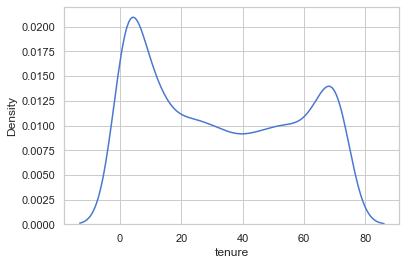

In [96]:
sns.distplot(train.tenure ,hist=False, bins=10);

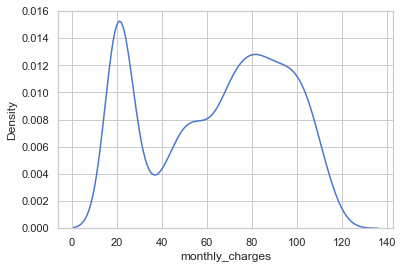

In [98]:
sns.distplot(train.monthly_charges ,hist=False, bins=10);

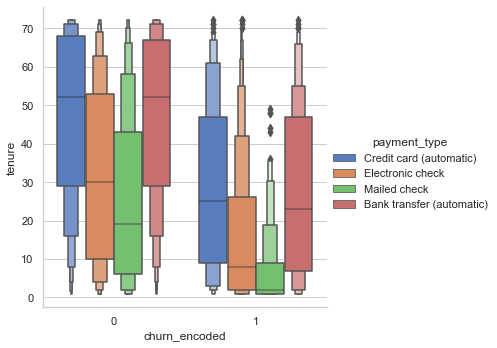

In [116]:
sns.catplot(x="churn_encoded", y="tenure", hue="payment_type", kind="boxen", data=train);

<AxesSubplot:>

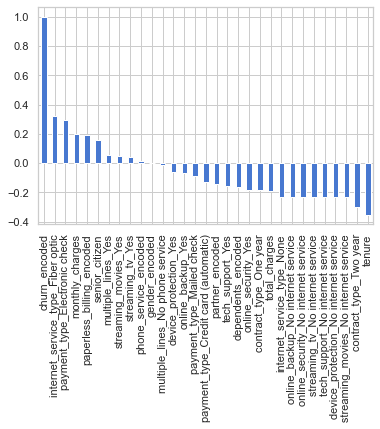

In [121]:
train.corr()['churn_encoded'].sort_values(ascending = False).plot(kind='bar')